# 1: Mile Stone Project 1 Intro 

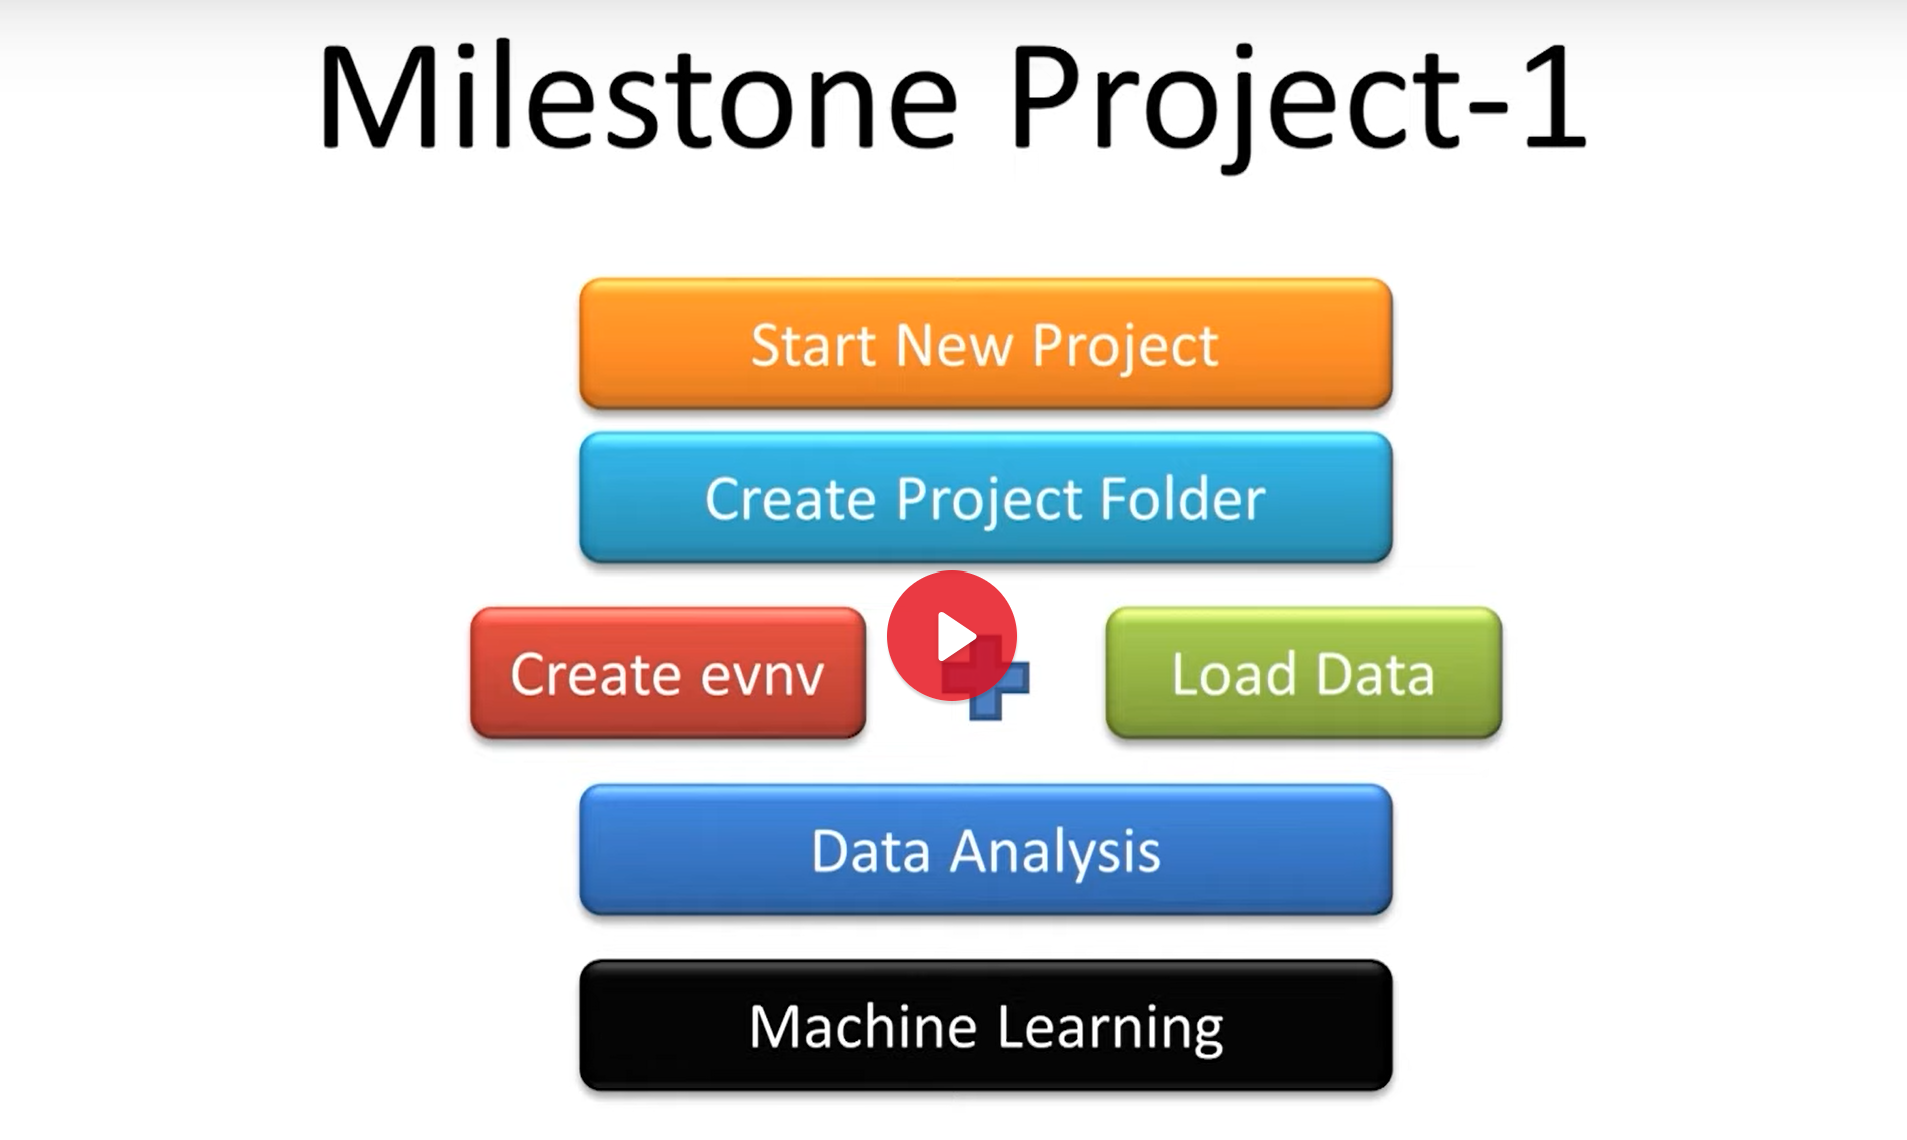

# Heart disease prediction project
we are going to predict whether some one has heart disease or not 
* 1 problem defination
* 2 Data
* 3 Evaluation
* 4 Feature
* 5 Modelling
* 6 Experimentation


# 1-Problem defination
* Based on given data we need to predict the patient has heart disease or not

# 2-Data
* We have data and have loaded it already

# 3-Evaluate
* In initial stages,we need to make sure that over model give the accuracy of 95%

# 4-Features
* what feature are import,what feature column mean what


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#impoting models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#import evaluation libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import recall_score,f1_score,precision_score
from sklearn.metrics import plot_roc_curve

# 6: Exploratory Data Analysis Part 1
* What problem that i am going to solve
* What kind of data that i have
* does this data have missing value  
* Are there any outlies
* can we add and remove some of the featre
 

In [2]:
df = pd.read_csv("heart.csv")
df.shape

(1025, 14)

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [5]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

<Axes: >

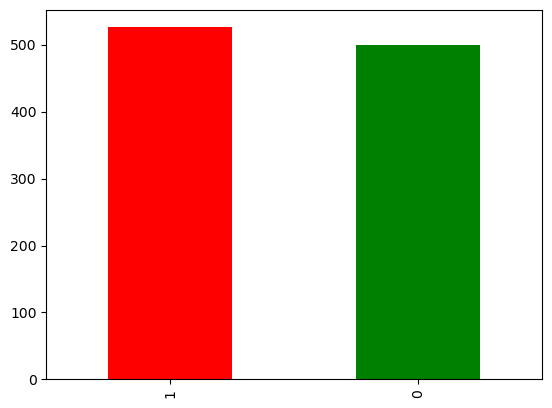

In [6]:
df["target"].value_counts().plot(kind="bar",color=["red","green"])

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

# 7: Exploratory Data Analysis Part 2 

In [9]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [10]:
pd.crosstab(df.target,df.sex)

sex       0    1
target          
0        86  413
1       226  300

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

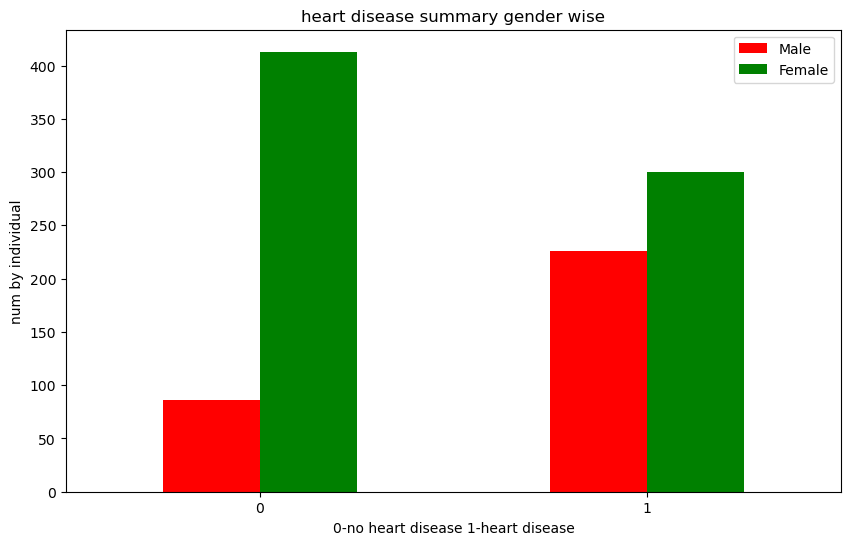

In [11]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                   color=["red","green"]
                                  )
plt.title("heart disease summary gender wise")
plt.xlabel("0-no heart disease 1-heart disease")
plt.ylabel("num by individual")
plt.legend(["Male","Female"])
plt.xticks(rotation =0)

# 8: Be Careful with Plot choice 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 [Text(0, 0, '71'),
  Text(1, 0, '88'),
  Text(2, 0, '90'),
  Text(3, 0, '95'),
  Text(4, 0, '96'),
  Text(5, 0, '97'),
  Text(6, 0, '99'),
  Text(7, 0, '103'),
  Text(8, 0, '105'),
  Text(9, 0, '106'),
  Text(10, 0, '108'),
  Text(11, 0, '109'),
  Text(12, 0, '111'),
  Text(13, 0, '112'),
  Text(14, 0, '113'),
  Text(15, 0, '114'),
  Text(16, 0, '115'),
  Text(17, 0, '116'),
  Text(18, 0, '117'),
  Text(19, 0, '118'),
  Text(20, 0, '120'),
  Text(21, 0, '121'),
  Text(22, 0, '122'),
  Text(23, 0, '123'),
  Text(24, 0, '124'),
  Text(25, 0, '125'),
  Text(26, 0, '126'),
  Text(27

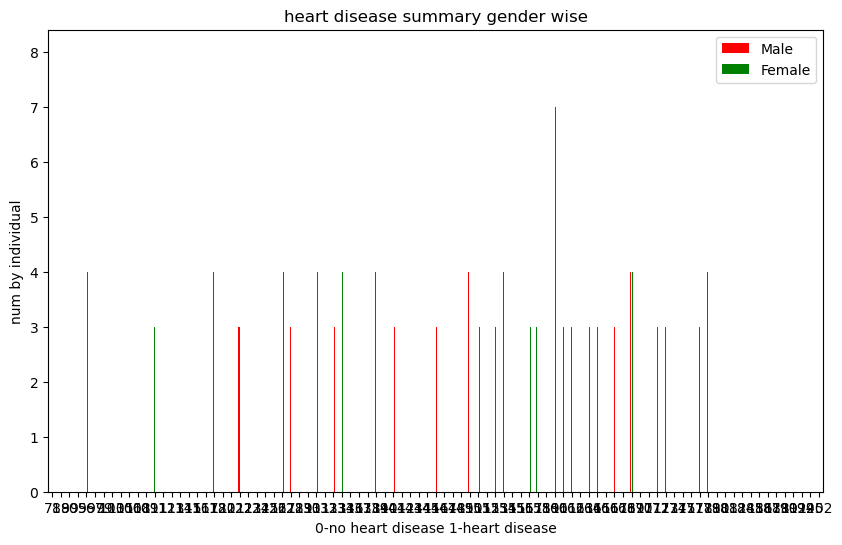

In [12]:
pd.crosstab(df.thalach,df.age).plot(kind="bar",
                                  figsize=(10,6),
                                   color=["red","green"]
                                  );
plt.title("heart disease summary gender wise")
plt.xlabel("0-no heart disease 1-heart disease")
plt.ylabel("num by individual")
plt.legend(["Male","Female"])
plt.xticks(rotation =0)

# 9: Scatter Plot to see any Pattren 

C:\Users\hp\AppData\Local\Temp\ipykernel_28464\1179196355.py:7: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("heart problem ","no heart problem");


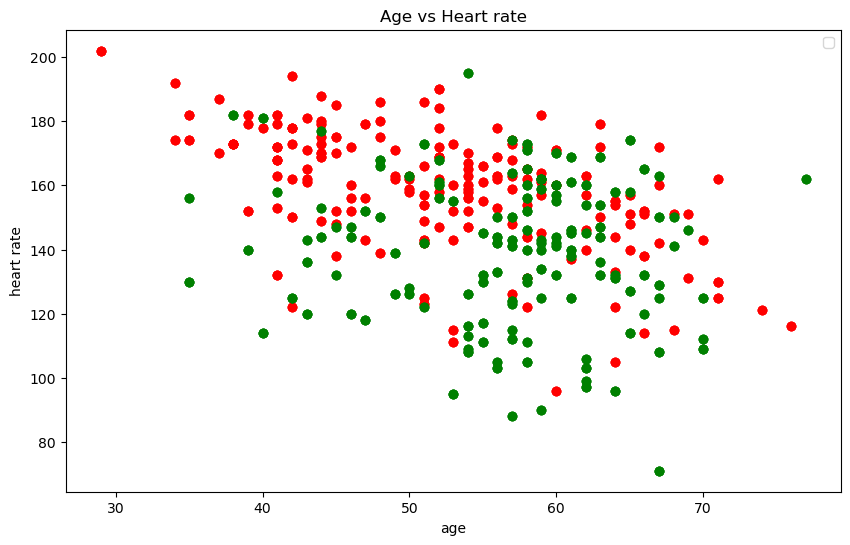

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="green")
plt.title("Age vs Heart rate")
plt.xlabel('age')
plt.ylabel('heart rate')
plt.legend("heart problem ","no heart problem");

# 10: Age Distribution 

<Axes: >

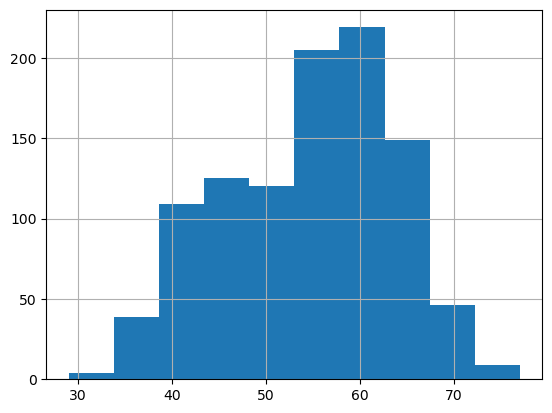

In [14]:
df.age.hist()

# 11: Chest paint type and Target relation Part 1 

In [15]:
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [16]:
pd.crosstab(df.cp,df.target)

target    0    1
cp              
0       375  122
1        33  134
2        65  219
3        26   51

# 12: Chest paint type and Target relation Part 2 

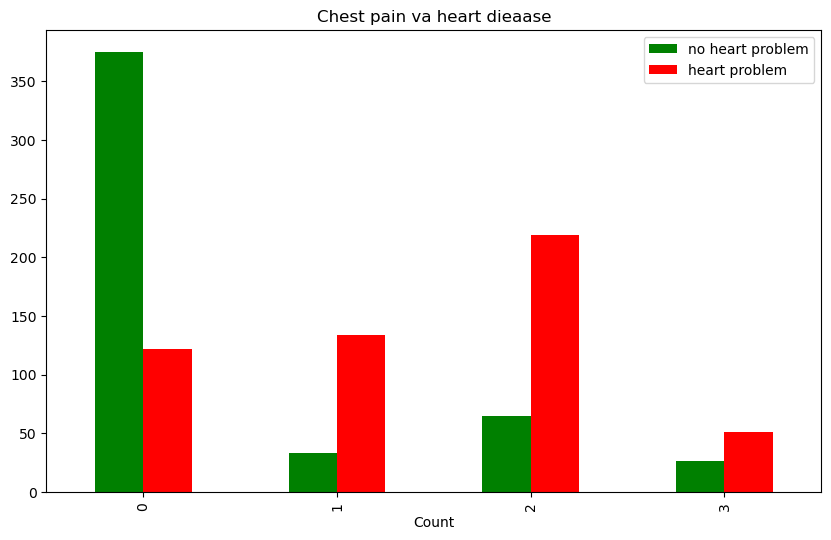

In [17]:
pd.crosstab(df.cp,df.target).plot(kind = "bar"
                                 ,figsize = (10,6)
                                 ,color= ["green","red"])
plt.title("Chest pain va heart dieaase")
plt.xlabel("Chest pain")
plt.xlabel("Count")
plt.legend(["no heart problem","heart problem"])

# 13: Correlation Matrix Part 1 

In [18]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [19]:
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341  0.059276  0.100244 -0.042177   
target   -0.229324 -0.279501  0.434854 -0.138772 -0.099966 -0.041164   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.132696 -0.390227  0.088163  0.208137 -0.169105  0.271551   
sex      -0.055117 -0.049365  0.139157  0.084687 -0.026666  0.111729   
cp        0.043581  0.306839 -0.401513 -0.174733  0.131633 -0.176206   
trestbps -0.123794 -0.039264  0.061197  0.187434 -0.120445  0.104554   
chol     -0.147410 -0.021772  0.067382  0.064880 -0.014248  0.074259   
fbs      -0.104051 -0.008866  0.049261  0.010859 -0.061902  0.137156   
restecg   1.000000  0.048411 -0.065606 -0.050114  0.086086 -0.078072   
thalach   0.048411  1.000000 -0.380281 -0.349796  0.395308 -0.207888   
exang    -0.065606 -0.380281  1.000000  0.310844 -0.267335  0.107849   
oldpeak  -0.050114 -0.349796  0.310844  1.000000 -0.575189  0.221816   
slope     0.086086  0.395308 -0.267335 -0.575189  1.000000 -0.073440   
ca       -0.078072 -0.207888  0.107849  0.221816 -0.073440  1.000000   
thal     -0.020504 -0.098068  0.197201  0.202672 -0.094090  0.149014   
target    0.134468  0.422895 -0.438029 -0.438441  0.345512 -0.382085   

              thal    target  
age       0.072297 -0.229324  
sex       0.198424 -0.279501  
cp       -0.163341  0.434854  
trestbps  0.059276 -0.138772  
chol      0.100244 -0.099966  
fbs      -0.042177 -0.041164  
restecg  -0.020504  0.134468  
thalach  -0.098068  0.422895  
exang     0.197201 -0.438029  
oldpeak   0.202672 -0.438441  
slope    -0.094090  0.345512  
ca        0.149014 -0.382085  
thal      1.000000 -0.337838  
target   -0.337838  1.000000

# 14: Plotting Correlation Matrix Part 2 

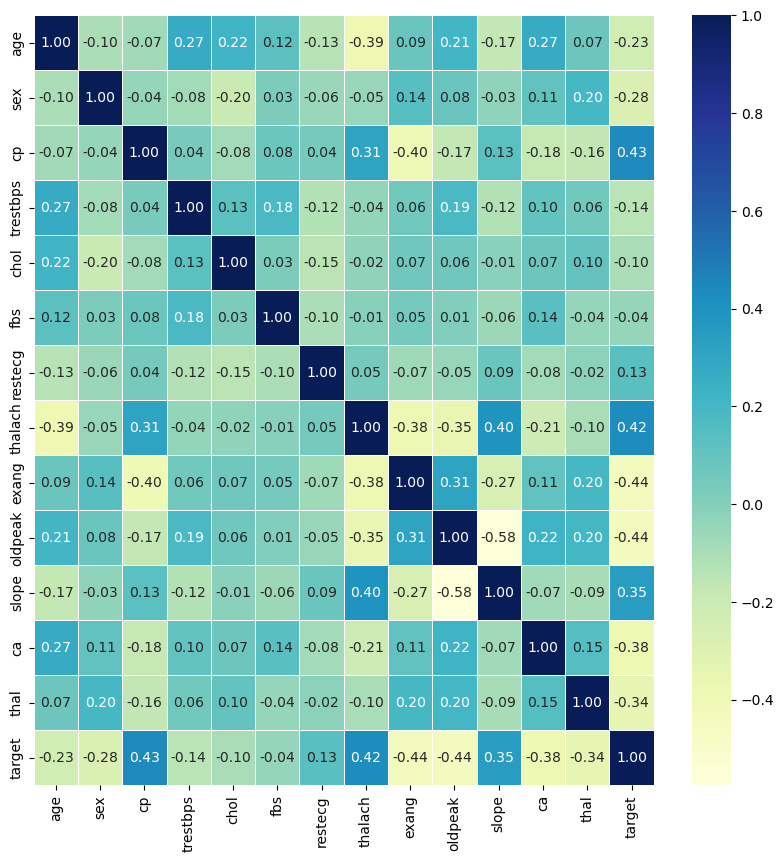

In [20]:
cor_map = df.corr()
home,room = plt.subplots(figsize=(10,10))
room = sns.heatmap(cor_map,
                  annot=True,
                  linewidths=0.5,
                  fmt = "0.2f",
                  cmap = "YlGnBu")

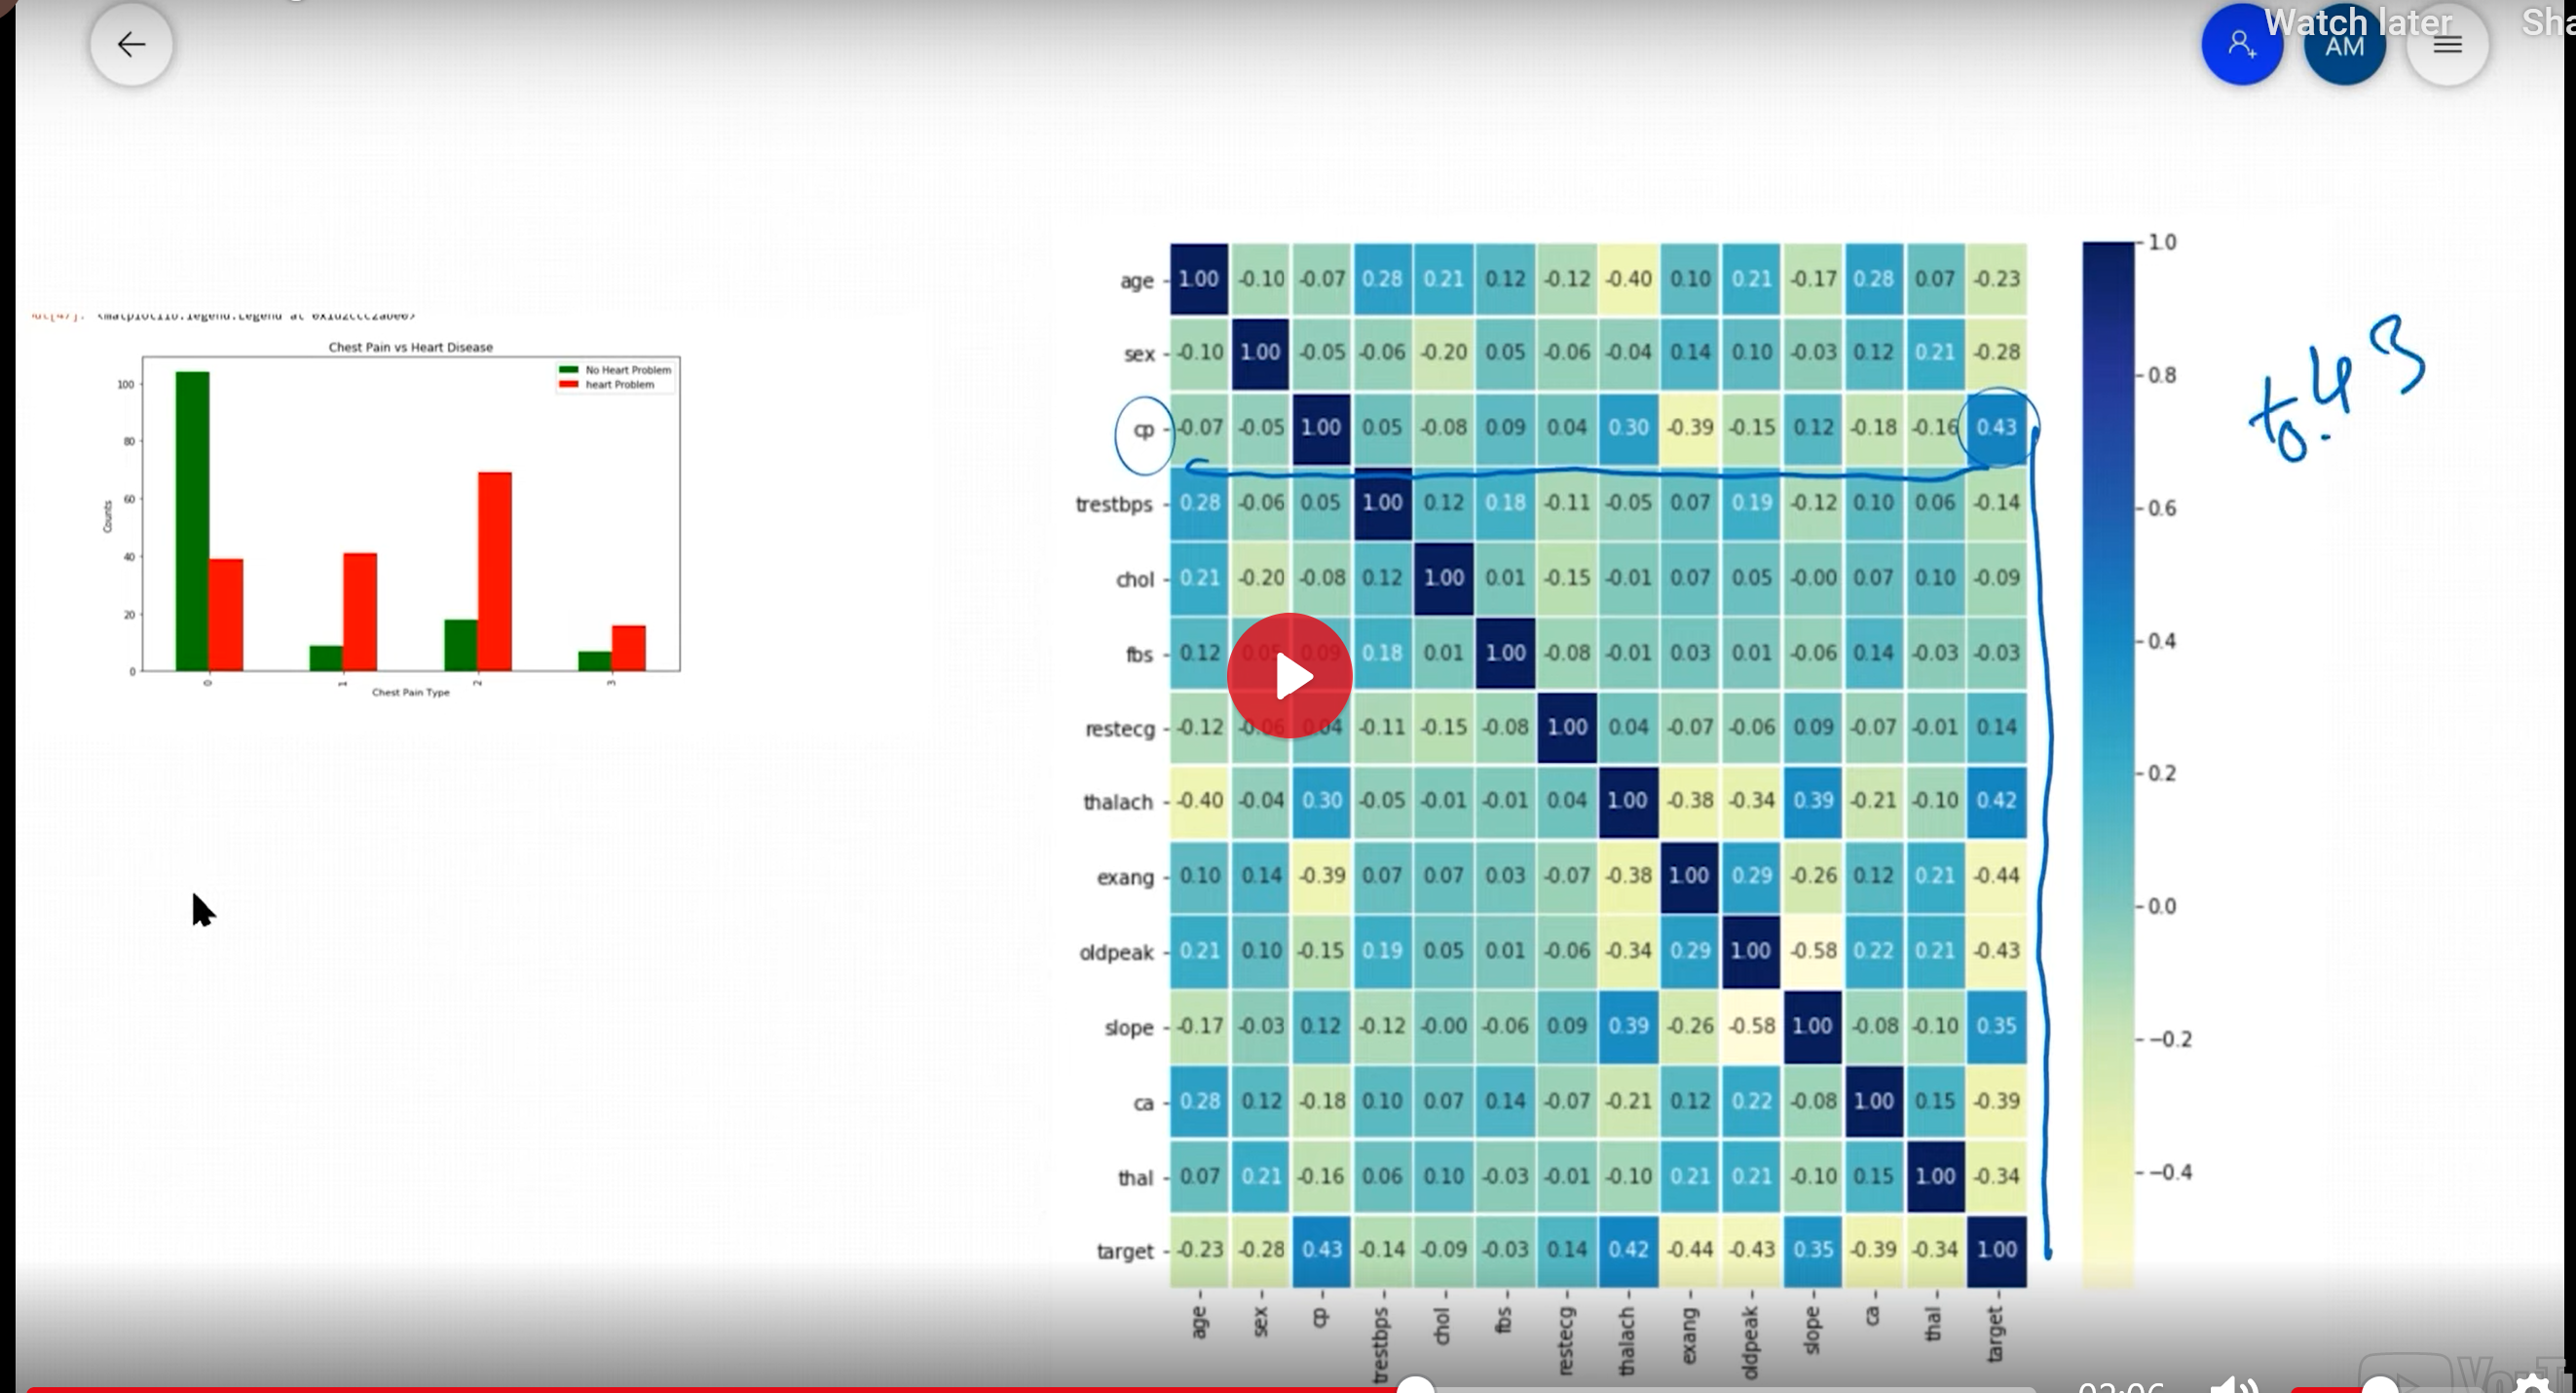

# 15: Modelling Split the data 

In [21]:
X = df.drop("target",axis=1)
y = df["target"]

In [22]:
np.random.seed(7)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [24]:
len(X)

1025

In [25]:
len(X_train)

820

# 16: Choosing the Right Model 
* K nearest neighbour classifer
* random forest classifer
* Loggistic regrsession

In [26]:
models = { "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "Logistic Regression":LogisticRegression()}

In [27]:
def fit_and_score(model,X_train,X_test,y_train,y_test):
    np.random.seed(7)
    model_score= {}
    for name,model in model.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [28]:
model_scores = fit_and_score(model = models,X_train = X_train,X_test = X_test,y_train = y_train,y_test =y_test)
model_scores

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7463414634146341,
 'Random Forest': 1.0,
 'Logistic Regression': 0.8780487804878049}

<Axes: >

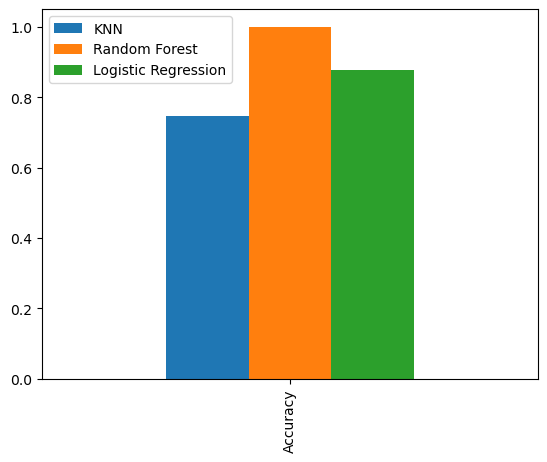

In [29]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.plot.bar()

# 17: Improving Model 
# Universal method
* hyper parameter tuning
* Feature improving
# Advance level
* confusion_matrix
* Cross validation
* Precision
* Recall
* F1
* Classification Report
* ROC Curve


In [30]:
KNN = KNeighborsClassifier()
KNN.set_params()

KNeighborsClassifier()

In [31]:
train_score =[]
test_score =[]

nneighbour = range(1,30)
KNN = KNeighborsClassifier()

for i in nneighbour:
    KNN.set_params(n_neighbors = i)
    KNN.fit(X_train,y_train)
    train_score.append(KNN.score(X_train,y_train))
    test_score.append(KNN.score(X_test,y_test))


In [32]:
train_score

[1.0,
 0.9951219512195122,
 0.9902439024390244,
 0.9451219512195121,
 0.9182926829268293,
 0.8219512195121951,
 0.7951219512195122,
 0.7914634146341464,
 0.75,
 0.775609756097561,
 0.774390243902439,
 0.7560975609756098,
 0.7536585365853659,
 0.7353658536585366,
 0.751219512195122,
 0.7658536585365854,
 0.7621951219512195,
 0.7463414634146341,
 0.7329268292682927,
 0.7329268292682927,
 0.7292682926829268,
 0.7341463414634146,
 0.7414634146341463,
 0.7378048780487805,
 0.7463414634146341,
 0.7341463414634146,
 0.7414634146341463,
 0.7402439024390244,
 0.7451219512195122]

In [33]:
test_score 

[0.9804878048780488,
 0.9414634146341463,
 0.9024390243902439,
 0.8,
 0.7463414634146341,
 0.7219512195121951,
 0.7317073170731707,
 0.7268292682926829,
 0.7414634146341463,
 0.7463414634146341,
 0.7121951219512195,
 0.7170731707317073,
 0.7170731707317073,
 0.7121951219512195,
 0.7463414634146341,
 0.7414634146341463,
 0.7317073170731707,
 0.7024390243902439,
 0.6829268292682927,
 0.6780487804878049,
 0.6731707317073171,
 0.6829268292682927,
 0.7268292682926829,
 0.7268292682926829,
 0.7463414634146341,
 0.7317073170731707,
 0.7317073170731707,
 0.7365853658536585,
 0.7365853658536585]

# 18: Plotting the Improved Model Score 

Max knn score:98.05%


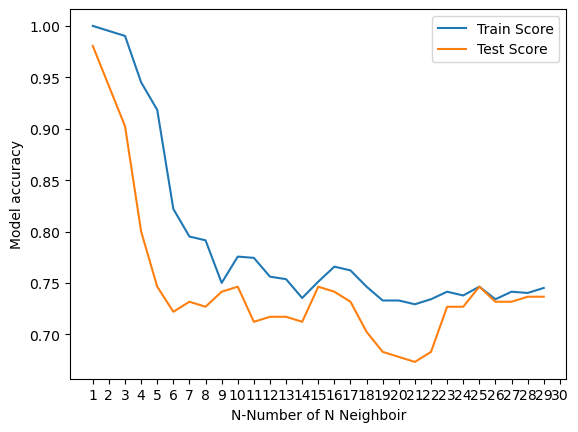

In [34]:
plt.plot(nneighbour,train_score,label = "Train Score")
plt.plot(nneighbour,test_score,label = "Test Score")

plt.xticks(np.arange(1,31,1))
plt.xlabel("N-Number of N Neighboir")
plt.ylabel("Model accuracy")
plt.legend()
print(f"Max knn score:{max(test_score)*100:0.2f}%")

# 19: Hyperparameter Tunning using GSCV 

* LogisticRegression
* RandomForestClassifer()

In [35]:
LR_hp = { 
    "C": np.logspace(-4,4,20),
    "solve": ["liblinear"]
}

# 20: Hyperparamters for RandomForestClassifier 

In [36]:
RFC_hp = {
    "n_estimators":np.arange(10,1600,100),
    "max_depth":[None,3,5,6,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2),
}
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
242   38    1   2       138   175    0        1      173      0      0.0   
360   48    1   0       122   222    0        0      186      0      0.0   
717   56    1   2       130   256    1        0      142      1      0.6   
271   44    1   1       120   263    0        1      173      0      0.0   
846   35    0   0       138   183    0        1      182      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
579   58    1   0       146   218    0        1      105      0      2.0   
502   46    0   2       142   177    0        0      160      1      1.4   
537   52    1   1       120   325    0        1      172      0      0.2   
196   58    1   0       100   234    0        1      156      0      0.1   
175   56    0   0       200   288    1        0      133      1      4.0   

     slope  ca  thal  
242      2   4     2  
360      2   0     2  
717      1   1     1  
271      2   0     3  
846      2   0     2  
..     ...  ..   ...  
579      1   1     3  
502      0   0     2  
537      2   0     2  
196      2   1     3  
175      0   2     3  

[820 rows x 13 columns]

In [37]:
np.random.seed(10)
lr = RandomizedSearchCV(LogisticRegression(),
                        param_distributions=LR_hp,
                        cv = 5,
                        n_iter=20,
                        verbose=True)
lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


ValueError: Invalid parameter 'solve' for estimator LogisticRegression(). Valid parameters are: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'].

# 21: Running the model with Hyperparemeters using GSCV 

In [38]:
lr.score(X_test,y_test)

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [39]:
lr.best_params()

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params'

In [40]:
np.random.seed(10)
rfc = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=RFC_hp,
                        cv = 5,
                        n_iter=20,
                        verbose=True)
rfc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [41]:
rfc.score(X_test,y_test)

0.9512195121951219

In [42]:
rfc.best_params_

{'n_estimators': 1510,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_depth': None}

# 
* by hand paramter tuining #done
* Randomized search cv #done
* Grid search cv #try

# 23: Hyperparameters Tunning Using Grid Search CV 

In [43]:
np.random.seed(10)
lr_gs = GridSearchCV(LogisticRegression(),
                        param_grid=LR_hp,
                        cv = 5,
                        verbose=True)


In [44]:
lr_gs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


ValueError: Invalid parameter 'solve' for estimator LogisticRegression(C=0.0001). Valid parameters are: ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'].

In [ ]:
lr_gs.score(X_test,y_test)

In [45]:
np.random.seed(10)
rfc_gs = GridSearchCV(RandomForestClassifier(),
                        param_grid=RFC_hp,
                        cv = 3,
                        verbose=True)
#rfc_gs.fit(X_train,y_train)

# 24: Summarizing 

# 25: What have we learnt 

# 26: Area under the curve and Confusion Matrix 

In [47]:
lr_gs.predict(X_test)
plot_roc_curve(lr_gr,X_test,y_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [48]:
print(confusion_matrix(y_test,y_predict))

NameError: name 'y_predict' is not defined

In [50]:
sns.set(font_scale=1.5)
def plot_confusion(y_test,y_predict):
    fig,ax = plt.subplot(figsize(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_predict),
                    annot= True,
                    cbar= False)
plot_confusion(y_test,y_preds)

NameError: name 'y_preds' is not defined

# 27: Plot the Classification report 

In [51]:
print(classification_report(y_test,y_pred))

NameError: name 'y_pred' is not defined

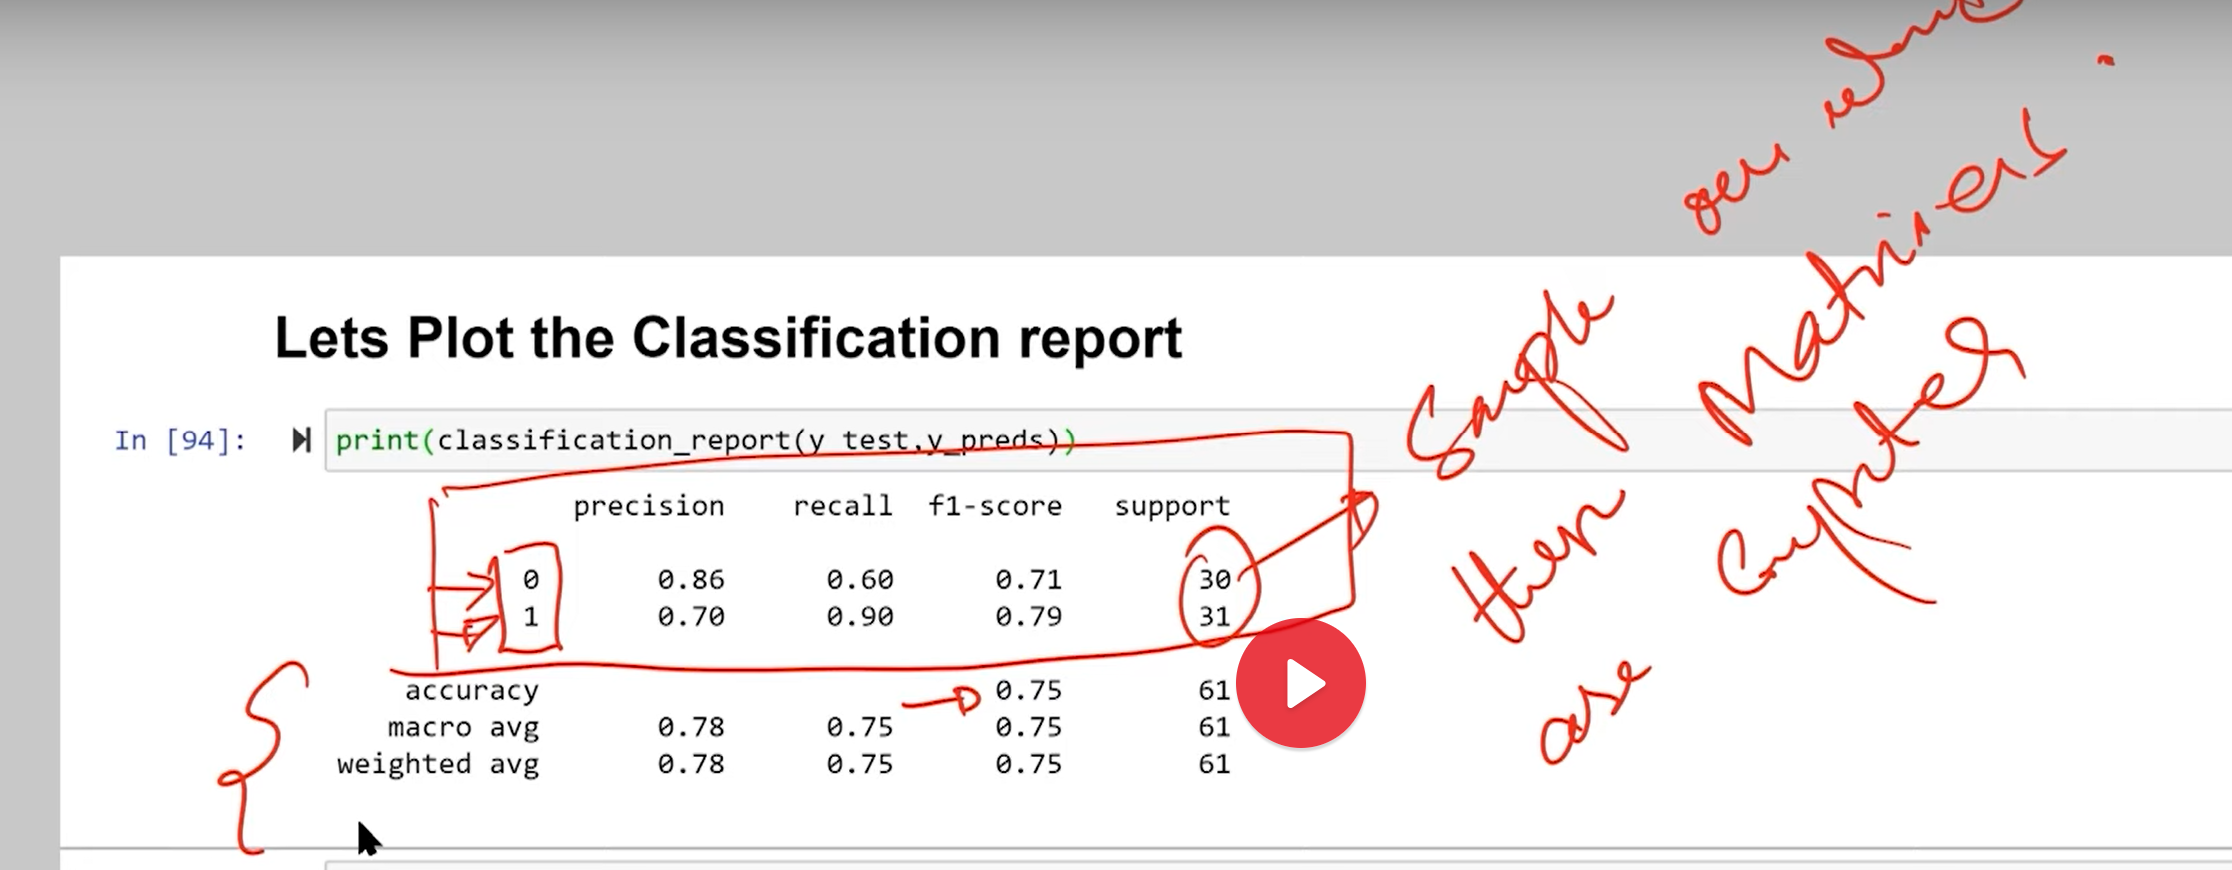

# 28: Lets see if Cross Validation layers help us 

In [54]:
lr_gs.best_params_


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [55]:
lr = LogisticRegression(C=0.615848,
                        solver= "liblinear")

In [ ]:
cv_accuracy = cross_val_score(lr,
                              X,
                              y,
                              cv=7,
                              scoring = "accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

In [ ]:
cv_precision = cross_val_score(lr,
                              X,
                              y,
                              cv=7,
                              scoring = "perision")
cv_precision = np.mean(cv_precision)
cv_precision

# 29: Visualizing Cross Validation Score 

In [57]:
cv_plot = pd.DataFrame({
    "Accuracy":cv_accuracy,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "f1":cv_f1
    
},index=[0])
cv_plot.T.plot.bar(title="comparision of matrics",
                legend=None)


NameError: name 'cv_accuracy' is not defined

# 30: Features Improvement 

In [58]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

In [59]:
lr.fit(X_train,y_train)

LogisticRegression(C=0.615848, solver='liblinear')

In [60]:
lr.coef_

array([[ 0.00297353, -1.81086555,  0.81765311, -0.01383943, -0.00532389,
        -0.31231723,  0.37836436,  0.03228932, -0.94453063, -0.45530746,
         0.55895761, -0.70228363, -0.77837706]])

In [61]:
final_coef = dict(zip(df.columns,list(lr.coef_[0])))

In [62]:
final_coef


{'age': 0.0029735293351110556,
 'sex': -1.8108655462757137,
 'cp': 0.8176531082805749,
 'trestbps': -0.013839431067991083,
 'chol': -0.005323892389697413,
 'fbs': -0.3123172340296812,
 'restecg': 0.37836435743818064,
 'thalach': 0.03228932482353896,
 'exang': -0.9445306323313618,
 'oldpeak': -0.45530745874757367,
 'slope': 0.5589576133762896,
 'ca': -0.7022836333968349,
 'thal': -0.7783770642691692}

<Axes: title={'center': 'feature Importance'}>

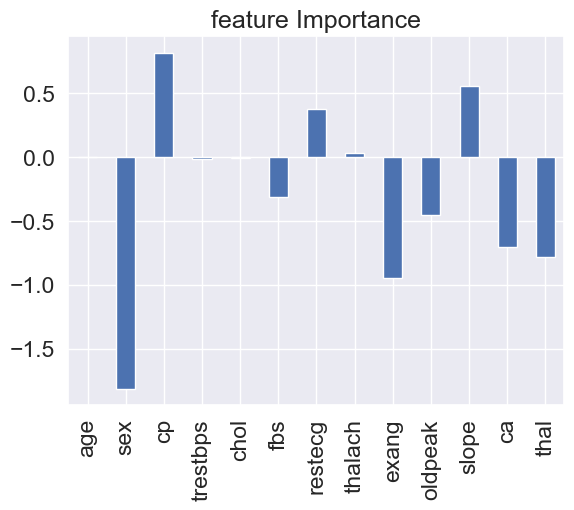

In [63]:
feature = pd.DataFrame(final_coef,index=[0])
feature.T.plot.bar(title="feature Importance",legend=False)

# 31: Conclusion 